In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)

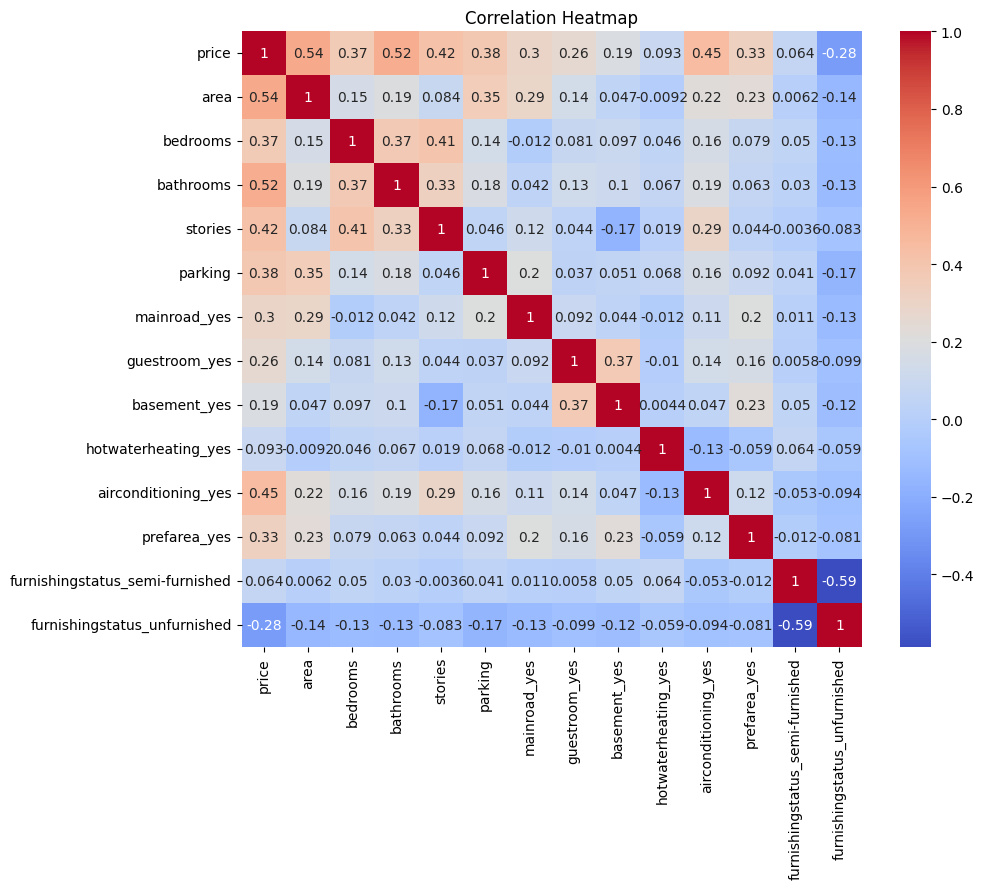

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
X = df.drop('price', axis=1)
y = df['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 1754318687330.6643
R-squared (R²) Score: 0.6529242642153184


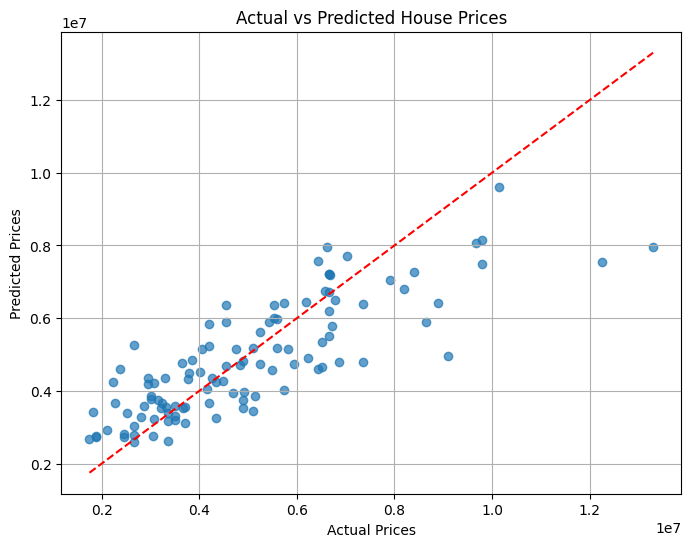

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

In [26]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
2,bathrooms,1.094445e+06
9,airconditioning_yes,7.914267e+05
8,hotwaterheating_yes,6.846499e+05
10,prefarea_yes,6.298906e+05
3,stories,4.074766e+05
7,basement_yes,3.902512e+05
5,mainroad_yes,3.679199e+05
6,guestroom_yes,2.316100e+05
4,parking,2.248419e+05
1,bedrooms,7.677870e+04


Project Summary: Predicting House Prices Using Linear Regression

Objective:
To build a predictive model using Linear Regression that estimates house prices based on various housing features.
This project demonstrates the complete machine learning pipeline, from data preprocessing to model evaluation and visualization.

Dataset Overview:
- Filename: Housing.csv
- Rows: 545
- Columns: 13
- Features Include: Area, number of bedrooms, bathrooms, parking, furnishing status, and more.
- Target Variable: price (numerical)

Key Steps and Techniques:
i. Data Exploration & Cleaning:

- Checked for null values and cleaned the dataset.

- Converted categorical variables using one-hot encoding.

ii. Feature Selection:

- Identified relevant numerical and categorical features.

- Removed the target (price) from the input features.

iii. Model Development:

- Used scikit-learn to implement Linear Regression.

- Split the dataset into 80% training and 20% testing.

iv. Model Evaluation:

- Mean Squared Error (MSE): 1,754,318,687,330.66

- R² Score: 0.653

- The model explained ~65.3% of the variance in house prices on unseen data.

v. Visualization:

- Created a scatter plot to visualize the actual vs predicted prices.

- Helped assess prediction quality and identify potential outliers.

Results Interpretation:
- The Linear Regression model gives a moderate fit to the data.

- While it captures general pricing trends, some variance remains unexplained, suggesting that more advanced techniques could improve accuracy.

Conclusion:
This project successfully showcases how Linear Regression can be applied to a real-world regression task like housing price prediction. 
It provides a good baseline model and builds a foundation for more complex models like Ridge, Lasso, or tree-based methods.